In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
eta=1.454;
chi=2.0;
epsilon=0.25;
xi=0.4;
ki=0;
kf=2;
xi0=0;
xif=1;
Pi=0;
Pf=1;
gamma0=-1
gammaf=1
gamma=0.5
k=1
dx=0.01;
dvar=0.5;
Pc=1/(eta+1);
P=0.4

In [38]:
def lists(string,d):
    if string=="k":
        l=np.arange(ki,kf+d,d)
    elif string=="gamma":
        l=np.arange(gamma0,gammaf+d,d)
    elif string=="P":
        l=np.arange(Pi,Pf+d,d)
    return l

In [39]:
def v0(P):
    if P>Pc:
        v0=1+(xi*np.pi*(1-epsilon*chi**2)-(1-P))/(eta*P)
    else:
        v0=0
    return v0

In [40]:
def graf_lists(var,xstring,varstring,nonvar):
    xlist=[];
    ylist=[];
    for x in lists(xstring,dx):
        globals()[xstring]=x
        globals()[varstring]=var
        globals()[nonvar]=nonvar
        xlist.append(x)
        y=(gamma+(1-P)-eta*P*(1-2*v0(P)))/(np.pi*(np.exp(-k**2/4)-epsilon*chi**2*np.exp(-(k*chi)**2/4)))
        ylist.append(y)
    return xlist,ylist

In [41]:
def graf(var,varstring,xstring,gamma,k,P):
    if xstring=="gamma":
        if varstring=="P":
            nonvar=k
            return graf_lists(var,xstring,varstring,nonvar)
        elif varstring=="k":
            nonvar=P
            return graf_lists(var,xstring,varstring,nonvar)
    elif xstring=="P":
        if varstring=="gamma":
            nonvar=k
            return graf_lists(var,xstring,varstring,nonvar)
        elif varstring=="k":
            nonvar=gamma
            return graf_lists(var,xstring,varstring,nonvar)
    elif xstring=="k":
        if varstring=="P":
            nonvar=gamma
            return graf_lists(var,xstring,varstring,nonvar)
        elif varstring=="gamma":
            nonvar=P
            return graf_lists(var,xstring,varstring,nonvar)

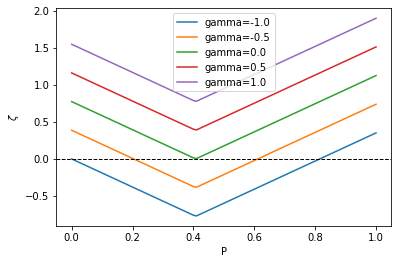

In [42]:
varstring="gamma"
xstring="P"
for var in lists(varstring,dvar):
    xlist, ylist=graf(var,varstring,xstring,gamma,k,P)
    plt.plot(xlist,ylist,label='{}={}'.format(varstring,var),rasterized=True)
plt.legend()
plt.axhline(y=0, color='k', ls='dashed', lw=1)
plt.xlabel(xstring)
plt.ylabel('$\zeta$')
plt.show()